# <span style="color:red"><u> **OC - PROJET 4 - Réalisez une étude de santé publique avec Python**</u></span>

# <span style="color:blue">I - Mise en forme</span>

### 1 - Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2 - Importation des fichiers CSV (Dataframe)

In [2]:
sousnut = pd.read_csv('sous_nutrition.csv')
dispo = pd.read_csv('dispo_alimentaire.csv')
populations = pd.read_csv('population.csv')
aides = pd.read_csv('aide_alimentaire.csv')

# <span style="color:blue">3 - Les Dataframes </span>

## <u><mark style="background-color:#CCFFCC;"> 3.1 - Dataframe "sousnut"</mark></u>

### 3.1.1 - Consultation des données de sousnut

#### Observation du dataframe avec la fonction ".head()"

In [3]:
sousnut.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


#### Observation des types de données composant le dataframe avec la fonction ".dtypes"

In [4]:
sousnut.dtypes

Zone      object
Année     object
Valeur    object
dtype: object

#### Les données sont de type 'object', les caractères présent sont divers (numérique, alphanumerique, décimaux) 
#### Je vais modifier ces valeurs ultérieurement

### 3.1.2 - Modification des séries (colonnes) avec la fonction "np.array"

In [5]:
sousnut.columns = np.array(["pays", "année", "population"])
sousnut.head()

,pays,année,population
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


### 3.1.2.1 - Modification de la série 'année' depuis le format de période 'xxxx-xxxx' au format année 'xxxx'

#### Utilisation de la fonction "année_format" pour renvoyer l'année du millieu de la plage

In [6]:
def année_format(année_code):
    if année_code == "2012-2014":
        return 2013
    
    elif année_code == "2013-2015":
        return 2014
    
    elif année_code == "2014-2016":
        return 2015
    
    elif année_code == "2015-2017":
        return 2016
    
    elif année_code == "2016-2018":
        return 2017
    
    elif année_code == "2017-2019":
        return 2018

#### Application de la fonction 'année_format' par ligne avec la fonction ".apply"

In [7]:
sousnut["année"] = sousnut["année"].apply(année_format)

##### Je vérifie que les changements de la fonction "année_format" soit bien exécuté

In [8]:
sousnut.head()

,pays,année,population
0,Afghanistan,2013,8.6
1,Afghanistan,2014,8.8
2,Afghanistan,2015,8.9
3,Afghanistan,2016,9.7
4,Afghanistan,2017,10.5


### 3.1.2.2 - Remplacement des valeurs '<0.1' par 'nan'

In [9]:
sousnut["population"]= sousnut["population"].str.replace("<0.1","nan",regex=True)

### 3.1.2.3 - Remplacement des valeurs manquantes par la valeur 0.0 avec la fonction ".fillna"

In [10]:
sousnut.fillna(0.0, inplace=True)

In [11]:
sousnut.info

<bound method DataFrame.info of              pays  année population
0     Afghanistan   2013        8.6
1     Afghanistan   2014        8.8
2     Afghanistan   2015        8.9
3     Afghanistan   2016        9.7
4     Afghanistan   2017       10.5
...           ...    ...        ...
1213     Zimbabwe   2014        0.0
1214     Zimbabwe   2015        0.0
1215     Zimbabwe   2016        0.0
1216     Zimbabwe   2017        0.0
1217     Zimbabwe   2018        0.0

[1218 rows x 3 columns]>

### 3.1.2.4 - Conversion des types de données pour la série 'année' avec la fonction "astype()" 

In [12]:
sousnut["année"] = sousnut.année.astype(int)
sousnut["population"] = sousnut.population.astype(float)

In [13]:
sousnut.dtypes

pays           object
année           int32
population    float64
dtype: object

#### Affichage des informations du dataframe avec la fonction ".info"

In [14]:
sousnut.info

<bound method DataFrame.info of              pays  année  population
0     Afghanistan   2013         8.6
1     Afghanistan   2014         8.8
2     Afghanistan   2015         8.9
3     Afghanistan   2016         9.7
4     Afghanistan   2017        10.5
...           ...    ...         ...
1213     Zimbabwe   2014         0.0
1214     Zimbabwe   2015         0.0
1215     Zimbabwe   2016         0.0
1216     Zimbabwe   2017         0.0
1217     Zimbabwe   2018         0.0

[1218 rows x 3 columns]>

#### Observation sous forme de résumé du dataframe avec la fonction ".describe()"

In [15]:
sousnut.describe()

,année,population
count,1218.000000,1098.000000
mean,2015.500000,2.900546
std,1.708527,14.874734
min,2013.000000,0.000000
25%,2014.000000,0.000000
50%,2015.500000,0.000000
75%,2017.000000,1.500000
max,2018.000000,203.800000


### 3.1.2.5 - passage des valeurs de "population" en unités

In [16]:
sousnut["population"] = sousnut["population"]*1000000
sousnut

,pays,année,population
0,Afghanistan,2013,8600000.0
1,Afghanistan,2014,8800000.0
2,Afghanistan,2015,8900000.0
3,Afghanistan,2016,9700000.0
4,Afghanistan,2017,10500000.0
...,...,...,...
1213,Zimbabwe,2014,0.0
1214,Zimbabwe,2015,0.0
1215,Zimbabwe,2016,0.0
1216,Zimbabwe,2017,0.0


### 3.1.2.6 - Suppression des valeurs manquantes 'nan' avec la fonction ".dropna"

In [17]:
sousnut.dropna(inplace = True)

In [18]:
sousnut

,pays,année,population
0,Afghanistan,2013,8600000.0
1,Afghanistan,2014,8800000.0
2,Afghanistan,2015,8900000.0
3,Afghanistan,2016,9700000.0
4,Afghanistan,2017,10500000.0
...,...,...,...
1213,Zimbabwe,2014,0.0
1214,Zimbabwe,2015,0.0
1215,Zimbabwe,2016,0.0
1216,Zimbabwe,2017,0.0


### 3.1.2.7 - Vérification d'absence de valeur 'NULL' avec la fonction ".isnull()"

In [19]:
sousnut.isnull().sum()

pays          0
année         0
population    0
dtype: int64

### 3.1.2.8 - Passage de la série "pays" en caractères minuscules avec la fonction ".lower()"

In [20]:
sousnut["pays"] = sousnut["pays"].str.lower()

### 3.1.2.9 - Suppression des parenthèses dans la série 'pays' avec la fonction ".replace()"

In [21]:
sousnut["pays"] = sousnut["pays"].replace ("[()]"," ", regex=True)
sousnut["pays"] = sousnut["pays"].replace ("[-]"," ", regex=True)
sousnut["pays"] = sousnut["pays"].replace ("[,]"," ", regex=True)

### 3.1.2.10 - renommage de valeurs de la série "pays"

In [22]:
sousnut ["pays"] = sousnut["pays"].str.replace("bolivie  état plurinational de ","bolivie", regex=True)
sousnut ["pays"] = sousnut["pays"].str.replace("chine   ras de hong kong","chine_hong-kong", regex=True)
sousnut ["pays"] = sousnut["pays"].str.replace("chine   ras de macao","chine_macao", regex=True)
sousnut ["pays"] = sousnut["pays"].str.replace("chine  taiwan province de","chine_taiwan", regex=True)
sousnut ["pays"] = sousnut["pays"].str.replace("el salvador","salvador", regex=True)
sousnut ["pays"] = sousnut["pays"].str.replace("iran  république islamique d'","iran", regex=True)
sousnut ["pays"] = sousnut["pays"].str.replace("micronésie  états fédérés de ","micronésie", regex=True)
sousnut ["pays"] = sousnut["pays"].str.replace("république arabe syrienne","syrie", regex=True)
sousnut ["pays"] = sousnut["pays"].str.replace("république de corée","corée du sud", regex=True)
sousnut ["pays"] = sousnut["pays"].str.replace("république de moldova","moldavie", regex=True)
sousnut ["pays"] = sousnut["pays"].str.replace("république démocratique populaire lao","laos", regex=True)
sousnut ["pays"] = sousnut["pays"].str.replace("république populaire démocratique de corée","corée du nord", regex=True)
sousnut ["pays"] = sousnut["pays"].str.replace("république unie de tanzanie","tanzanie", regex=True)
sousnut ["pays"] = sousnut["pays"].str.replace("royaume uni de grande bretagne et d'irlande du nord","royaume uni", regex=True)
sousnut ["pays"] = sousnut["pays"].str.replace("venezuela république bolivarienne du","venezuela", regex=True)

#### Observation

In [23]:
sousnut

,pays,année,population
0,afghanistan,2013,8600000.0
1,afghanistan,2014,8800000.0
2,afghanistan,2015,8900000.0
3,afghanistan,2016,9700000.0
4,afghanistan,2017,10500000.0
...,...,...,...
1213,zimbabwe,2014,0.0
1214,zimbabwe,2015,0.0
1215,zimbabwe,2016,0.0
1216,zimbabwe,2017,0.0


## <u><mark style="background-color:#CCFFCC;"> 3.2 - Dataframe "dispo"</mark></u>

   ### 3.2.1 - Consultation des données de dispo

In [24]:
dispo

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,NaN,NaN,45.0,4.70,4.28,1.41,3.0,NaN,0.0,3.0,NaN,2.0,NaN,NaN,NaN
15601,Îles Salomon,Viande de Volailles,animale,NaN,NaN,11.0,3.34,0.69,1.14,2.0,NaN,2.0,2.0,NaN,0.0,NaN,NaN,NaN
15602,Îles Salomon,"Viande, Autre",animale,NaN,NaN,0.0,0.06,NaN,0.04,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15603,Îles Salomon,Vin,vegetale,NaN,NaN,0.0,0.07,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


#### Verification des types de données

In [25]:
dispo.dtypes

Zone                                                              object
Produit                                                           object
Origine                                                           object
Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                                             

### 3.2.2 - Renommage des séries

In [26]:
dispo.rename(columns={"Zone":"pays"},inplace=True)
dispo.rename(columns={"Produit":"produit"},inplace=True)
dispo.rename(columns={"Origine":"origine"},inplace=True)
dispo.rename(columns={"Aliments pour animaux":"aliments_animaux"},inplace=True)
dispo.rename(columns={"Autres Utilisations":"autres_utilisations"},inplace=True)
dispo.rename(columns={"Disponibilité alimentaire (Kcal/personne/jour)":"calories(kcal/pers/jour)"},inplace=True)
dispo.rename(columns={"Disponibilité alimentaire en quantité (kg/personne/an)":"qte(g/pers/jour)"},inplace=True)
dispo.rename(columns={"Disponibilité de matière grasse en quantité (g/personne/jour)":"lipides(g/pers/jour)"},inplace=True)
dispo.rename(columns={"Disponibilité de protéines en quantité (g/personne/jour)":"proteines(g/pers/jour)"},inplace=True)
dispo.rename(columns={"Disponibilité intérieure":"dispo_inter"},inplace=True)
dispo.rename(columns={"Exportations - Quantité":"export*1000t"},inplace=True)
dispo.rename(columns={"Importations - Quantité":"import*1000t"},inplace=True)
dispo.rename(columns={"Nourriture":"nourriture*1000t"},inplace=True)
dispo.rename(columns={"Pertes":"pertes*1000t"},inplace=True)
dispo.rename(columns={"Production":"production*1000t"},inplace=True)
dispo.rename(columns={"Semences":"semences*1000t"},inplace=True)
dispo.rename(columns={"Traitement":"traitement*1000t"},inplace=True)
dispo.rename(columns={"Variation de stock":"variation_stock*1000t"},inplace=True)

In [27]:
dispo

,pays,produit,origine,aliments_animaux,autres_utilisations,calories(kcal/pers/jour),qte(g/pers/jour),lipides(g/pers/jour),proteines(g/pers/jour),dispo_inter,export*1000t,import*1000t,nourriture*1000t,pertes*1000t,production*1000t,semences*1000t,traitement*1000t,variation_stock*1000t
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,NaN,NaN,45.0,4.70,4.28,1.41,3.0,NaN,0.0,3.0,NaN,2.0,NaN,NaN,NaN
15601,Îles Salomon,Viande de Volailles,animale,NaN,NaN,11.0,3.34,0.69,1.14,2.0,NaN,2.0,2.0,NaN,0.0,NaN,NaN,NaN
15602,Îles Salomon,"Viande, Autre",animale,NaN,NaN,0.0,0.06,NaN,0.04,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15603,Îles Salomon,Vin,vegetale,NaN,NaN,0.0,0.07,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


### 3.2.3 - Remplacement des valeurs manquantes par la valeur '0.0'

In [28]:
dispo.fillna(0.0, inplace=True)

In [29]:
dispo

,pays,produit,origine,aliments_animaux,autres_utilisations,calories(kcal/pers/jour),qte(g/pers/jour),lipides(g/pers/jour),proteines(g/pers/jour),dispo_inter,export*1000t,import*1000t,nourriture*1000t,pertes*1000t,production*1000t,semences*1000t,traitement*1000t,variation_stock*1000t
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,0.0,0.0,45.0,4.70,4.28,1.41,3.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0
15601,Îles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,3.34,0.69,1.14,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
15602,Îles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.06,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15603,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3.2.4 - Conversion de la série qte(kg/pers/an) en 'g/pers/jour'

In [30]:
dispo["qte(g/pers/jour)"] = (dispo["qte(g/pers/jour)"] * 1000)/365

In [31]:
dispo

,pays,produit,origine,aliments_animaux,autres_utilisations,calories(kcal/pers/jour),qte(g/pers/jour),lipides(g/pers/jour),proteines(g/pers/jour),dispo_inter,export*1000t,import*1000t,nourriture*1000t,pertes*1000t,production*1000t,semences*1000t,traitement*1000t,variation_stock*1000t
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,4.712329,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,3.534247,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.164384,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.000000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,7.397260,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,0.0,0.0,45.0,12.876712,4.28,1.41,3.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0
15601,Îles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,9.150685,0.69,1.14,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
15602,Îles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.164384,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15603,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.191781,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3.2.5 - Vérification d'absence de valeur 'null'

In [32]:
dispo.isnull().sum()

pays                        0
produit                     0
origine                     0
aliments_animaux            0
autres_utilisations         0
calories(kcal/pers/jour)    0
qte(g/pers/jour)            0
lipides(g/pers/jour)        0
proteines(g/pers/jour)      0
dispo_inter                 0
export*1000t                0
import*1000t                0
nourriture*1000t            0
pertes*1000t                0
production*1000t            0
semences*1000t              0
traitement*1000t            0
variation_stock*1000t       0
dtype: int64

### 3.2.6 - Passage de la série "pays" en caractères minuscules

In [33]:
dispo["pays"] = dispo["pays"].str.lower()

### 3.2.7 - suppression des prenthèses dans la série "pays"

In [34]:
dispo["pays"] = dispo["pays"].replace("[()]","", regex=True)
dispo["pays"] = dispo["pays"].str.replace ("[-]"," ", regex=True)
dispo["pays"] = dispo["pays"].str.replace ("[,]"," ", regex=True)

### 3.2.8 - Renommage de valeurs dans la série "pays"

In [35]:
dispo["pays"]=dispo["pays"].str.replace("bolivie état plurinational de","bolivie", regex=True)
dispo["pays"]=dispo["pays"].str.replace("chine   ras de hong kong","chine_hong-kong", regex=True)
dispo["pays"]=dispo["pays"].str.replace("chine   ras de macao","chine_macao", regex=True)
dispo["pays"]=dispo["pays"].str.replace("chine  taiwan province de","chine_taiwan", regex=True)
dispo["pays"]=dispo["pays"].str.replace("el salvador","salvador", regex=True)
dispo["pays"]=dispo["pays"].str.replace("iran république islamique d'","iran", regex=True)
dispo["pays"]=dispo["pays"].str.replace("république arabe syrienne","syrie", regex=True)
dispo["pays"]=dispo["pays"].str.replace("république de corée","corée du sud", regex=True)
dispo["pays"]=dispo["pays"].str.replace("république de moldova","moldavie", regex=True)
dispo["pays"]=dispo["pays"].str.replace("république démocratique populaire lao","laos", regex=True)
dispo["pays"]=dispo["pays"].str.replace("république populaire démocratique de corée","corée du nord", regex=True)
dispo["pays"]=dispo["pays"].str.replace("république unie de tanzanie","tanzanie", regex=True)
dispo["pays"]=dispo["pays"].str.replace("venezuela  république bolivarienne du ","venezuela", regex=True)

## <u><mark style="background-color:#CCFFCC;"> 3.3 - Dataframe "populations"</mark></u>

   ### 3.3.1 - Consultation des données de populations

In [36]:
populations

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113
...,...,...,...
1411,Zimbabwe,2014,13586.707
1412,Zimbabwe,2015,13814.629
1413,Zimbabwe,2016,14030.331
1414,Zimbabwe,2017,14236.595


In [37]:
populations.dtypes

Zone       object
Année       int64
Valeur    float64
dtype: object

### 3.3.2 - Renommage des séries

In [38]:
populations.rename(columns={"Zone":"pays"},inplace=True)
populations.rename(columns={"Année":"année"},inplace=True)
populations.rename(columns={"Valeur":"population"},inplace=True)

In [39]:
populations

,pays,année,population
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113
...,...,...,...
1411,Zimbabwe,2014,13586.707
1412,Zimbabwe,2015,13814.629
1413,Zimbabwe,2016,14030.331
1414,Zimbabwe,2017,14236.595


### 3.3.3 -  Verification d'absence de valeur 'null'

In [40]:
populations.isnull().sum()

pays          0
année         0
population    0
dtype: int64

### 3.3.4 - Passage des valeurs de  'populations'  en unités

In [41]:
populations["population"] = populations["population"]*1000

### 3.3.5 - Modification du type de données pour la série 'populations'

In [42]:
populations["population"] = populations.population.astype(int)

In [43]:
populations

,pays,année,population
0,Afghanistan,2013,32269589
1,Afghanistan,2014,33370794
2,Afghanistan,2015,34413603
3,Afghanistan,2016,35383032
4,Afghanistan,2017,36296113
...,...,...,...
1411,Zimbabwe,2014,13586707
1412,Zimbabwe,2015,13814629
1413,Zimbabwe,2016,14030331
1414,Zimbabwe,2017,14236595


In [44]:
populations.dtypes

pays          object
année          int64
population     int32
dtype: object

### 3.3.6 - Passage de la série 'pays' en caractères minuscules

In [45]:
populations["pays"] = populations["pays"].str.lower()

### 3.3.7 - Suppression des prenthèses dans la série 'pays'

In [46]:
populations["pays"] = populations["pays"].replace("[()]","", regex=True)
populations["pays"] = populations["pays"].str.replace ("[-]"," ", regex=True)
populations["pays"] = populations["pays"].str.replace ("[,]"," ", regex=True)

### 3.3.8 - Renommage de valeurs dans la série "pays"

In [47]:
populations ["pays"] = populations["pays"].str.replace("bolivie état plurinational de","bolivie", regex=True)
populations ["pays"] = populations["pays"].str.replace("chine   ras de hong kong","chine_hong-kong", regex=True)
populations ["pays"] = populations["pays"].str.replace("chine   ras de macao","chine_macao", regex=True)
populations ["pays"] = populations["pays"].str.replace("chine  taiwan province de","chine_taiwan", regex=True)
populations ["pays"] = populations["pays"].str.replace("el salvador","salvador", regex=True)
populations ["pays"] = populations["pays"].str.replace("iran république islamique d'","iran", regex=True)
populations ["pays"] = populations["pays"].str.replace("république arabe syrienne","syrie", regex=True)
populations ["pays"] = populations["pays"].str.replace("république de corée","corée du sud", regex=True)
populations ["pays"] = populations["pays"].str.replace("république de moldova","moldavie", regex=True)
populations ["pays"] = populations["pays"].str.replace("république démocratique populaire lao","laos", regex=True)
populations ["pays"] = populations["pays"].str.replace("république populaire démocratique de corée","corée du nord", regex=True)
populations ["pays"] = populations["pays"].str.replace("république unie de tanzanie","tanzanie", regex=True)
populations ["pays"] = populations["pays"].str.replace("venezuela  république bolivarienne du ","venezuela", regex=True)
populations ["pays"] = populations["pays"].str.replace("royaume uni de grande bretagne et d'irlande du nord","royaume uni", regex=True)
populations ["pays"] = populations["pays"].str.replace("sint maarten  partie néerlandaise","saint martin partie néerlandaise", regex=True)

## <u><mark style="background-color:#CCFFCC;"> 3.4 Dataframe "aides"</mark></u>

### 3.4.1 - Observation du dataframe 'aides'

In [48]:
aides

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96
1471,Zimbabwe,2013,Non-céréales,5022
1472,Zimbabwe,2014,Non-céréales,2310
1473,Zimbabwe,2015,Non-céréales,306


In [49]:
aides.dtypes

Pays bénéficiaire    object
Année                 int64
Produit              object
Valeur                int64
dtype: object

### 3.4.2 - Renommage des séries

In [50]:
aides.rename(columns={"Pays bénéficiaire":"pays"},inplace = True)
aides.rename(columns={"Année":"année"},inplace = True)
aides.rename(columns={"Produit":"produit"},inplace = True)
aides.rename(columns={"Valeur":"tonnes"},inplace = True)

In [51]:
aides

,pays,année,produit,tonnes
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96
1471,Zimbabwe,2013,Non-céréales,5022
1472,Zimbabwe,2014,Non-céréales,2310
1473,Zimbabwe,2015,Non-céréales,306


### 3.4.3 - Vérification d'absence de valeur 'null'

In [52]:
aides.isnull().sum()

pays       0
année      0
produit    0
tonnes     0
dtype: int64

In [53]:
sousnut

,pays,année,population
0,afghanistan,2013,8600000.0
1,afghanistan,2014,8800000.0
2,afghanistan,2015,8900000.0
3,afghanistan,2016,9700000.0
4,afghanistan,2017,10500000.0
...,...,...,...
1213,zimbabwe,2014,0.0
1214,zimbabwe,2015,0.0
1215,zimbabwe,2016,0.0
1216,zimbabwe,2017,0.0


### 3.4.4 - Passage de la série 'pays' en caractères minuscules

In [54]:
aides["pays"] = aides["pays"].str.lower()

### 3.4.5 - Suppression des prenthèses dans la série 'pays'

In [55]:
aides["pays"] = aides["pays"].replace("[()]","", regex=True)
aides["pays"] = aides["pays"].str.replace ("[-]"," ", regex=True)
aides["pays"] = aides["pays"].str.replace ("[,]"," ", regex=True)

### 3.4.6 - Renommage de valeurs dans la série 'pays'

In [56]:
aides ["pays"] = aides["pays"].str.replace("bolivie état plurinational de","bolivie", regex=True)
aides ["pays"] = aides["pays"].str.replace("el salvador","salvador", regex=True)
aides ["pays"] = aides["pays"].str.replace("iran république islamique d'","iran", regex=True)
aides ["pays"] = aides["pays"].str.replace("république arabe syrienne","syrie", regex=True)
aides ["pays"] = aides["pays"].str.replace("république démocratique populaire lao","laos", regex=True)
aides ["pays"] = aides["pays"].str.replace("république populaire démocratique de corée","corée du nord", regex=True)
aides ["pays"] = aides["pays"].str.replace("république unie de tanzanie","tanzanie", regex=True)

# <span style="color:blue">II - Les questions</span>

## 1 - <u>Les demandes de Marc pour 2017</u>

### 1.1 proportion de personnes en état de sous-nutrition dans le monde

#### Calcul de la population mondiale

In [57]:
population_mondiale_2017 = np.sum(populations.loc[populations["année"]==2017]["population"])
print(f"La population mondiale en 2017 est de : {population_mondiale_2017:,} habitants")

La population mondiale en 2017 est de : 7,548,134,097 habitants


In [58]:
populations.dtypes

pays          object
année          int64
population     int32
dtype: object

#### Calcul de la population sous alimentées

In [59]:
pop_sousnut = np.sum(sousnut.loc[sousnut["année"] == 2017]["population"])
proportion_sousnut = round(pop_sousnut / population_mondiale_2017*100,2)
print(f"La proportion de personnes sous alimentées en 2017 est de : {proportion_sousnut} %")

La proportion de personnes sous alimentées en 2017 est de : 7.1 %


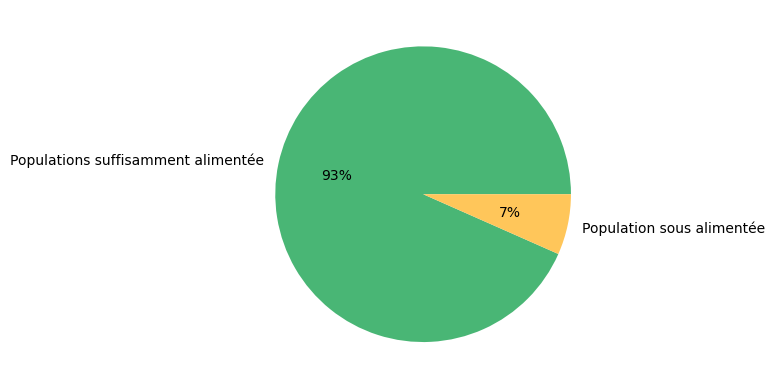

In [60]:
data = [population_mondiale_2017, pop_sousnut]
labels = ["Populations suffisamment alimentée", "Population sous alimentée"]
colors = ["#49b675", "#ffc65a"]
plt.pie(data, labels = labels, colors = colors, autopct = "%0.0f%%")
plt.show()

### 1.2 Nombre théorique de personnes qui pourraient être nourries à partir de la disponibilité alimentaire mondiale

###### <span style="color:#94a4c0"> *une recherche sur internet permet de connaitre l'apport conseillé moyen pour un homme (2400kcal) et une femme (2200kcal)* </span>

In [61]:
ajr_moyen = 2300
ajr_annuel = ajr_moyen*365

In [62]:
populations_dispo = dispo.merge(populations.loc[populations["année"]==2017, ["pays","population"]],on="pays")
print(populations_dispo["population"])

0        36296113
1        36296113
2        36296113
3        36296113
4        36296113
           ...   
15506      636039
15507      636039
15508      636039
15509      636039
15510      636039
Name: population, Length: 15511, dtype: int32


#### Calcul de la disponibilité alimentaire mondiale

In [63]:
populations_dispo["dispo_kcal"] = populations_dispo["calories(kcal/pers/jour)"] * populations_dispo["population"] * 365
dispo_alim = populations_dispo["dispo_kcal"].sum()
print(f"La disponibilité alimentaire mondiale est de : {int(dispo_alim):,} calories/personne/jour")

La disponibilité alimentaire mondiale est de : 7,718,847,048,220,055 calories/personne/jour


#### Total d'êtres humains pouvant être nourris:

In [64]:
total_h_cal = np.sum(round(populations_dispo["dispo_kcal"]) / ajr_annuel)
print(f"Le total de la population pouvant être nourris est de : {int(total_h_cal):,} habitants")

Le total de la population pouvant être nourris est de : 9,194,576,591 habitants


#### Population mondiale en 2017

In [65]:
population_mondiale_2017 = populations.loc[populations["année"]==2017,"population"].sum()
print(f"La population mondiale en 2017 : {population_mondiale_2017:,} habitants")

La population mondiale en 2017 : 7,548,134,097 habitants


#### Proportion en rapport avec la population mondiale

In [66]:
proportion = round(total_h_cal*100/population_mondiale_2017,2)
print(f"La proportion de personnes pouvant être nourries est de :",proportion,"%")

La proportion de personnes pouvant être nourries est de : 121.81 %


### 1.3 - Nombre théorique de personnes qui pourraient être nourries à partir de la disponibilité alimentaire végétale mondiale

#### Calcul de la disponibilité alimentaire végétale mondiale

In [67]:
dispo_vegetale = populations_dispo.loc[populations_dispo["origine"]=="vegetale","calories(kcal/pers/jour)"]
disp_vege = dispo_vegetale.sum()
print(f"La disponibilité alimentaire végétale mondiale est de : {int(disp_vege):,} kcal/pers/jour")

La disponibilité alimentaire végétale mondiale est de : 396,364 kcal/pers/jour


#### Calcul de la disponibilité végétale mondiale sur l'année

In [68]:
total_dispo_vegetale = dispo_vegetale*populations_dispo["population"]*365
print(f"La disponibilité végétale mondiale sur une année est de : {int(total_dispo_vegetale.sum()):,} Kcal")

La disponibilité végétale mondiale sur une année est de : 6,359,679,474,504,460 Kcal


#### Nombre de personnes pouvant être nourries par l'alimentation végétale

In [69]:
total_h_vegetal = round(total_dispo_vegetale.sum()/ajr_annuel,2)
print(f"Avec l'alimentation vegetale nous pourrions nourrir : {int(total_h_vegetal):,} personnes")

Avec l'alimentation vegetale nous pourrions nourrir : 7,575,556,253 personnes


#### Proportion de la disponibilité végétale avec la population mondiale

In [70]:
proportion_vegetale = round(total_h_vegetal*100/population_mondiale_2017,2)
print(f"La disponibilité végétale mondiale couvre : {proportion_vegetale:,} % de la population mondiale")

La disponibilité végétale mondiale couvre : 100.36 % de la population mondiale


### 1.4 - Utilisation de la disponibilité intérieure concernant :

#### L'alimentation animale

In [71]:
production_totale = dispo["production*1000t"].sum()  
print(f"Production animale totale : {int(production_totale):,} tonnes")  

Production animale totale : 10,009,680 tonnes


#### Calcul de la nourriture destinée à l'alimentation animale

In [72]:
qte_aliments_animaux = dispo["aliments_animaux"].sum()

#### La proportion de nourriture destinée à l'alimentation animale

In [73]:
part_aliments_animaux = round((qte_aliments_animaux/production_totale)*100,2)
print(f"La proportion de nourriture destinée à l'alimentation animale : {part_aliments_animaux} %")

La proportion de nourriture destinée à l'alimentation animale : 13.03 %


### 1.4.1 - La part qui est perdue

##### Production perdue

In [74]:
pertes = dispo["pertes*1000t"].sum()
print(f"La production qui est perdue est de : {int(pertes):,} tonnes")

La production qui est perdue est de : 453,698 tonnes


#### Proportion de la production perdue

In [75]:
part_pertes = round((pertes/production_totale)*100,2)
print(f"La proportion de production qui est perdue est de :",part_pertes,"%")

La proportion de production qui est perdue est de : 4.53 %


### 1.4.2 - Part utilisée pour l'alimentation humaine

#### Production destinée à l'alimentation humaine :

In [76]:
nourriture = dispo["nourriture*1000t"].sum()
print(f"La production destinée à l'alimentation humaine est de : {int(nourriture):,} tonnes")

La production destinée à l'alimentation humaine est de : 4,876,258 tonnes


#### Proportion réservée à l'alimentation humaine:

In [77]:
part_nourriture = round((nourriture / production_totale)*100,2)
print(f"La part réservée à l'alimentation humaine est de :",part_nourriture,"%")

La part réservée à l'alimentation humaine est de : 48.72 %


# 2 - <u>Les demandes de Mélanie</u>

### 2.1 - Pays où la proportion des personnes sous alimentées est la plus forte en 2017

#### Merge du dataframe "populations" et "sousnut", pour l'année 2017 sur les séries "pays" et "population"

In [78]:
populations_sousnut = sousnut.merge(populations.loc[populations["année"]==2017, ["pays","population"]],on="pays")
print(populations_sousnut)

             pays  année  population_x  population_y
0     afghanistan   2013     8600000.0      36296113
1     afghanistan   2014     8800000.0      36296113
2     afghanistan   2015     8900000.0      36296113
3     afghanistan   2016     9700000.0      36296113
4     afghanistan   2017    10500000.0      36296113
...           ...    ...           ...           ...
1075     zimbabwe   2014           0.0      14236595
1076     zimbabwe   2015           0.0      14236595
1077     zimbabwe   2016           0.0      14236595
1078     zimbabwe   2017           0.0      14236595
1079     zimbabwe   2018           0.0      14236595

[1080 rows x 4 columns]


#### Renommage des colonnes "population_x" et "population_y"

In [79]:
populations_sousnut.rename(
    columns = {
        "population_x":"population_sousnut",
        "population_y":"population_totale"
        },
    inplace = True
)

#### Calcul de la population sous-alimentée par pays

In [80]:
def calcul_proportion (x,y):
    return x/y

populations_sousnut["proportions"] = populations_sousnut.apply(lambda row:
round( calcul_proportion(row["population_sousnut"],row["population_totale"])*100,2), axis=1) 

print(populations_sousnut,"%")

             pays  année  population_sousnut  population_totale  proportions
0     afghanistan   2013           8600000.0           36296113        23.69
1     afghanistan   2014           8800000.0           36296113        24.25
2     afghanistan   2015           8900000.0           36296113        24.52
3     afghanistan   2016           9700000.0           36296113        26.72
4     afghanistan   2017          10500000.0           36296113        28.93
...           ...    ...                 ...                ...          ...
1075     zimbabwe   2014                 0.0           14236595         0.00
1076     zimbabwe   2015                 0.0           14236595         0.00
1077     zimbabwe   2016                 0.0           14236595         0.00
1078     zimbabwe   2017                 0.0           14236595         0.00
1079     zimbabwe   2018                 0.0           14236595         0.00

[1080 rows x 5 columns] %


#### Suppression de la limite d'affichage des lignes

In [81]:
pd.set_option("display.max_rows",20)

#### Création d'un dataframe pour avec que les données concernant 2017 et avec affichage des séries "pays" et "proportions"

In [82]:
resultat=populations_sousnut.loc[(populations_sousnut["année"]==2017),["pays","proportions"]].copy()

#### Regroupement dans la variable des valeurs égales à zéro dans "valeurs_nulles"

In [83]:
valeurs_nulles= resultat[resultat["proportions"]==0.00].index

#### Suppression des valeurs égales à zéro dans la série "proportions"

In [84]:
resultat.drop(valeurs_nulles, inplace=True)

#### Classement 20 premiers pays avec le taux de populations sous alimentée

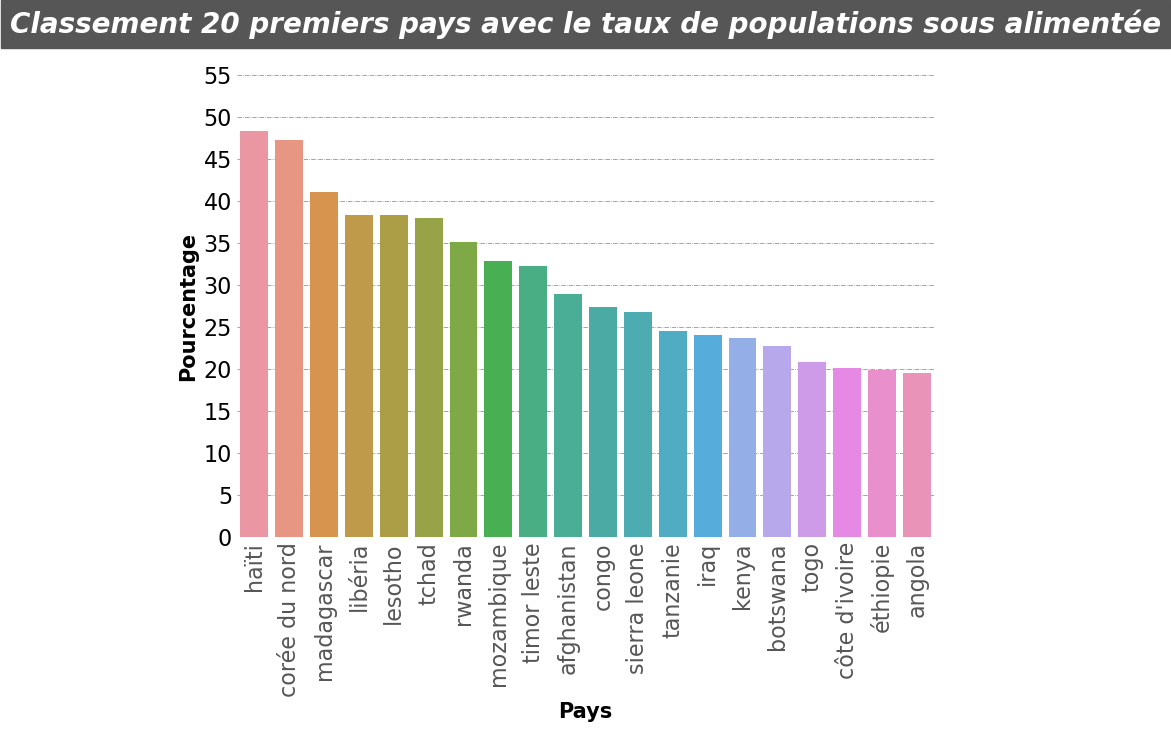

In [85]:
visual = resultat.sort_values(by='proportions',ascending=False).head(20)
fig, ax = plt.subplots(figsize=(9,6))
sns.barplot(x='pays', y='proportions', data=visual, ci=95, ax=ax)
ax.set_title('Classement 20 premiers pays avec le taux de populations sous alimentée', backgroundcolor='#565656',
             fontsize=20, weight='bold', color='white', style='italic', loc='center', pad=30)
ax.tick_params(labelsize=16, length=0)
plt.box(False)
ax.yaxis.grid(linewidth=0.5, color='grey', linestyle='-.')
ax.set_axisbelow(True)
ax.set_xlabel('Pays', weight='bold', size=15)
ax.set_ylabel('Pourcentage', weight='bold', size=15)
plt.yticks(np.arange(0, 60, 5))
plt.xticks(rotation=90, color='#565656')
plt.show()

###### <span style="color:#94a4c0">La plupart de ces pays sont classé comme des pays à faible revenu ou à revenu intermédiaire inférieur par la banque mondiale. </span>
###### <span style="color:#94a4c0">Ces pays ont été affecté par des conflits armées, des crises humanitaire et des difficultés économiques. </span>
###### <span style="color:#94a4c0">Ils ont également un PIB par habitant relativement bas et un accès limité aux services de base tels que l'éducation et les soins de santé. </span>
###### <span style="color:#94a4c0">Certains de ces pays sont également caractérisés par une grande diversité ethnique, religieuse, linguistique et ont des histoires de ralation conflictuelles entre les différents groupes. </span>

### 2.2 - Pays ayant le plus bénéficié d'aides depuis 2013 (en milliers de tonnes)

In [86]:
aide=aides.groupby("pays").sum()[["tonnes"]].copy()
print(aide.sort_values(by=["tonnes"], ascending=False))

                tonnes
pays                  
syrie          1858943
éthiopie       1381294
yémen          1206484
soudan du sud   695248
soudan          669784
...                ...
égypte            1122
vanuatu            802
timor leste        116
géorgie             70
bolivie              6

[76 rows x 1 columns]


### 2.3 - Pays ayant le plus / moins de disponibilité par habitant

#### Pays avec le plus de disponibilité par habitants (calories)

In [87]:
dispo_pays_cal = dispo[["pays","produit","calories(kcal/pers/jour)"]].groupby("pays").sum()
dispo_pays_cal.sort_values(by="calories(kcal/pers/jour)", ascending=False).head(10)

,calories(kcal/pers/jour)
pays,
autriche,3770.0
belgique,3737.0
turquie,3708.0
états unis d'amérique,3682.0
israël,3610.0
irlande,3602.0
italie,3578.0
luxembourg,3540.0
égypte,3518.0


#### Pays avec le moins de disponibilité par habitants (calories)

In [88]:
dispo_pays_cal = dispo[["pays","produit","calories(kcal/pers/jour)"]].groupby("pays").sum()
dispo_pays_cal.sort_values(by="calories(kcal/pers/jour)").head(10)

,calories(kcal/pers/jour)
pays,
république centrafricaine,1879.0
zambie,1924.0
madagascar,2056.0
afghanistan,2087.0
haïti,2089.0
corée du nord,2093.0
tchad,2109.0
zimbabwe,2113.0
ouganda,2126.0


#### Pays avec le plus de disponibilité par habitants (quantitée)

In [89]:
dispo_pays_qte = round(dispo[["pays","produit","qte(g/pers/jour)"]].groupby("pays").sum(),2)
dispo_pays_qte.sort_values(by="qte(g/pers/jour)", ascending=False).head(10)

,qte(g/pers/jour)
pays,
monténégro,3316.19
luxembourg,3152.49
irlande,3151.10
albanie,3001.48
finlande,2996.63
grèce,2933.97
pays bas,2929.37
autriche,2929.32
lituanie,2876.90


#### Pays avec le moins de disponibilité par habitants (quantitée)

In [90]:
dispo_pays_qte = round(dispo[["pays","produit","qte(g/pers/jour)"]].groupby("pays").sum(),2)
dispo_pays_qte.sort_values(by="qte(g/pers/jour)").head(10)

,qte(g/pers/jour)
pays,
tchad,875.21
zimbabwe,922.16
zambie,959.23
afghanistan,962.77
éthiopie,971.37
guinée bissau,982.14
bangladesh,998.74
timor leste,1011.23
yémen,1028.52


#### Pays avec le plus de disponibilité par habitants (lipides)

In [91]:
dispo_pays_lip = dispo[["pays","produit","lipides(g/pers/jour)"]].groupby("pays").sum()
dispo_pays_lip.sort_values(by="lipides(g/pers/jour)",ascending=False).head(10)

,lipides(g/pers/jour)
pays,
autriche,170.44
belgique,161.95
états unis d'amérique,161.37
france,159.15
italie,154.69
suisse,153.35
israël,151.39
islande,151.35
australie,150.81


#### Pays avec le moins de disponibilité par habitants (lipides)

In [92]:
dispo_pays_lip = dispo[["pays","produit","lipides(g/pers/jour)"]].groupby("pays").sum()
dispo_pays_lip.sort_values(by="lipides(g/pers/jour)").head(10)

,lipides(g/pers/jour)
pays,
rwanda,23.77
madagascar,24.49
éthiopie,25.89
bangladesh,29.92
lesotho,32.26
afghanistan,33.50
cambodge,35.93
corée du nord,36.41
laos,38.86


#### Pays avec le plus de disponibilité par habitants (proteines)

In [93]:
dispo_pays_prot = dispo[["pays","produit","proteines(g/pers/jour)"]].groupby("pays").sum()
dispo_pays_prot.sort_values(by="proteines(g/pers/jour)",ascending=False).head(10)

,proteines(g/pers/jour)
pays,
islande,133.06
chine_hong-kong,129.07
israël,128.00
lituanie,124.36
maldives,122.32
finlande,117.56
luxembourg,113.64
monténégro,111.90
pays bas,111.46


#### Pays avec le moins de disponibilité par habitants (proteines)

In [94]:
dispo_pays_prot = dispo[["pays","produit","proteines(g/pers/jour)"]].groupby("pays").sum()
dispo_pays_prot.sort_values(by="proteines(g/pers/jour)").head(10)

,proteines(g/pers/jour)
pays,
libéria,37.66
guinée bissau,44.05
mozambique,45.68
république centrafricaine,46.04
madagascar,46.69
haïti,47.70
zimbabwe,48.32
congo,51.41
ouganda,52.64


## 3 - <u> Les demandes de Julien</u>

### 3.1 - Lien logique entre les 10 variables

#### Equation à 3 termes de type (A1+A2+[...]= B1+B2+[...]= C1+C2+[...]) faisant intervenir chacune des quantités données.

#### Création d'un dataframe "ble_fr" pour vérification des données:

In [95]:
ble_fr = np.sum(dispo[(dispo["pays"] == "france") & (dispo["produit"] == "Blé")])
ble_fr

pays                            france
produit                            Blé
origine                       vegetale
aliments_animaux                7822.0
autres_utilisations             2824.0
calories(kcal/pers/jour)         811.0
qte(g/pers/jour)            297.068493
lipides(g/pers/jour)               4.2
proteines(g/pers/jour)           25.99
dispo_inter                    20298.0
export*1000t                   21502.0
import*1000t                    2055.0
nourriture*1000t                6971.0
pertes*1000t                     358.0
production*1000t               38614.0
semences*1000t                   748.0
traitement*1000t                1575.0
variation_stock*1000t           1131.0
dtype: object

#### Premier terme de l'équation : disponibilté intérieure

In [96]:
dispo_inter1 = np.sum(ble_fr["dispo_inter"])
print(f"La disponibilité intérieure est de : {int(dispo_inter1):,} tonnes")

La disponibilité intérieure est de : 20,298 tonnes


#### Second terme de l'équation

In [97]:
dispo_inter2 = (int(ble_fr["production*1000t"])
                     + int(ble_fr["import*1000t"])
                     - int(ble_fr["export*1000t"])
                     + int(ble_fr["variation_stock*1000t"]))

print(f"La disponibilité intérieure est de : {int(dispo_inter2):,} tonnes")

La disponibilité intérieure est de : 20,298 tonnes


#### Troisieme terme de l'équation 

In [98]:
dispo_inter3 = (int(ble_fr["nourriture*1000t"])
                     + int(ble_fr["aliments_animaux"])
                     + int(ble_fr["semences*1000t"])
                     + int(ble_fr["traitement*1000t"])
                     + int(ble_fr["autres_utilisations"])
                     + int(ble_fr["pertes*1000t"]))

print(f"La disponibilité intérieure est de : {int(dispo_inter3):,} tonnes")

La disponibilité intérieure est de : 20,298 tonnes


###### <span style="color:#94a4c0">Logique des 10 variables - Disponibilité intérieure = production + importations- exportations + variation des stocks = nourriture + aliments pour animaux + semences + traitement + autres utilisations + pertes. </span>

### 3.2 - Répartition entre l'alimentation humaine et animale

#### Création d'une liste de produits alimentaires céréaliers

In [99]:
liste_cereales = ["Blé","Riz (Eq Blanchi)","Orge", "Maïs","Seigle","avoine","Millet", "Sorgho", "Céréales, Autres","Sésame"]

#### Création d'une table ne contenant que les informations des céréales

In [100]:
cereales = dispo.loc[dispo["produit"].isin(liste_cereales),:]

In [101]:
resultat_animal = round(cereales["aliments_animaux"].sum()*100/cereales["dispo_inter"].sum(),2)
print(f"La proportion d'alimentation animale est de :",resultat_animal,"%")

La proportion d'alimentation animale est de : 35.9 %


In [102]:
resultat_nourriture = round(cereales["nourriture*1000t"].sum()*100/cereales["dispo_inter"].sum(),2)
print(f"La proportion d'alimentation humaine est de :",resultat_nourriture,"%")

La proportion d'alimentation humaine est de : 42.99 %


### 3.3 - Manioc Thaïlande

#### Proportion de la population souffrant de sous-nutrition en thaïlande pour l'année 2018 :

#### Sélection de la thaïlande dans le dataframe "sousnut"

In [103]:
thai_sounut = sousnut.loc[sousnut["pays"] == "thaïlande",:]

#### Sélection de la thaïlande dans le dataframe "populations"

In [104]:
thai_pop = populations.loc[populations["pays"]  == "thaïlande",:]

#### Calcul des proportions et sélection de la ligne ayant l'indice 5 (correspondant à 2018) sur les df "thai_sounut" et "thai_pop"

In [105]:
resultat_thai_sounut = round(thai_sounut["population"].iloc[5]*100 / thai_pop["population"].iloc[5],2)
print (f"La proportion de la population en état de sous-nutrition est de :", resultat_thai_sounut , "% en Thaïlande")

La proportion de la population en état de sous-nutrition est de : 9.36 % en Thaïlande


#### Proportion de manioc exporté

In [106]:
thai_manioc = dispo.loc[(dispo["produit"]== "Manioc")&(dispo["pays"]=="thaïlande"),["export*1000t","production*1000t"]].copy()
thai_manioc["proportion_export"] = round((thai_manioc["export*1000t"])*100/(thai_manioc["production*1000t"]),2)
resultat_thai_manioc=thai_manioc["proportion_export"].sum()
print(f"La proportion de manioc exporté est de : ", resultat_thai_manioc , "%")

La proportion de manioc exporté est de :  83.41 %


###### <span style="color:#94a4c0">La Thaïlande est un grand producteur de manioc. Elle dispose de bonne conditions climatique et les sols de ses régions sont très favorable à sa culture. </span>
###### <span style="color:#94a4c0">L'exportation de manioc est un moyen important pour le pays de gagnés des devises étrangères. </span>
###### <span style="color:#94a4c0">La demande de manioc en Asie est en hausse en raison de sa croissance démographique et de son utilisation dans l'alimentation animale, l'industrie de la bière et sucrière. </span>